## Linear Regression

In [3]:
data_url = 'https://raw.githubusercontent.com/ashukrishna100/Machine-Learning-Algorithms/master/forestfires.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(data_url)
df = df[['temp','area']]
df.head()

,temp,area
0,8.2,0.0
1,18.0,0.0
2,14.6,0.0
3,8.3,0.0
4,11.4,0.0


In [4]:
x = df.temp
y = df.area

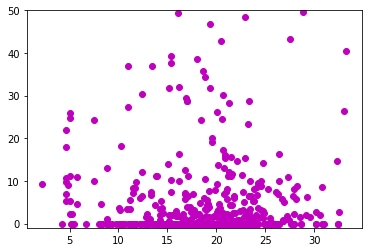

In [9]:
plt.scatter(x,y,color='m')
plt.ylim(-1, 50)
plt.show()

Method 1 - correlation & standard deviation for a and b (y = ax +b)

In [49]:
def estimate_coef(x,y):
    
    ## y = b_0 + b_1*x
    
    # number of observations/points 
    n = np.size(x)
    
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
    
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x
    
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x
    
    return(b_0,b_1)
print(estimate_coef(x,y))


(-7.413751564769942, 1.0726276210600427)


Method 2 - Least Square

In [51]:
def correlation(x,y):
    ## for dataframe objects,both x amnd y are dataframe objects
    return(x.corr(y))

def standard_deviation(a):
    ## for dataframe objects
    return(a.std())

mean = lambda b:b.mean()

def least_squares_fit(x, y):
    """given training values for x and y,
    find the least-squares values of alpha and beta""" 
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta
least_squares_fit(x,y)



(-7.413751564770017, 1.0726276210600467)

In [54]:
b = estimate_coef(x,y)
y_pred=df['temp'].apply(lambda a:b[0]+b[1]*a)

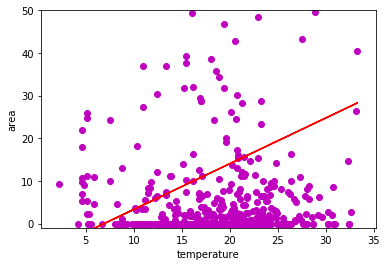

In [62]:
plt.xlabel('temperature')
plt.ylabel('area')
plt.plot(x,y_pred,color= 'r')
plt.scatter(x,y,color='m')
plt.ylim(-1, 50)
plt.show()


In [63]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))
y_predicted = lm.predict(np.array(x).reshape(-1,1))

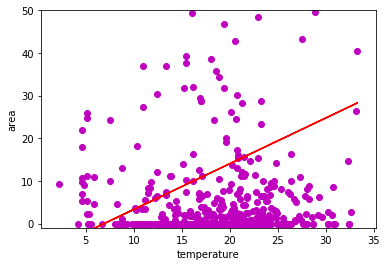

In [64]:
plt.xlabel('temperature')
plt.ylabel('area')
plt.plot(x,y_pred,color= 'r')
plt.scatter(x,y,color='m')
plt.ylim(-1, 50)
plt.show()


In [68]:
print (lm.coef_,lm.intercept_)

[[ 1.07262762]] [-7.41375156]


In [70]:
from sklearn.metrics import mean_squared_error, r2_score
import math
mse = mean_squared_error(y , y_predicted)
print("mean squared error is :",mse)
print("root mean squared error is :",math.sqrt(mse))

mean squared error is : 4005.50830877
root mean squared error is : 63.28908522620091


In [71]:
r2_score(y , y_predicted)


0.0095734693414910588

In [72]:
m = 0
c = 0

L = 0.001  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*x + c  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    print ()
    
print (m, c)

0.718366567927 -0.0925396959346


## Numpy stuff

In [33]:
a = np.arange(1,11)
b = a.copy()[::-1]*10

In [47]:
ss = 0
s = np.zeros(10)
for i in range (10):
    s[i] = (a[i]*b[i])
    ss += a[i]*b[i]
print (s,ss)

[ 100.  180.  240.  280.  300.  300.  280.  240.  180.  100.] 2200


In [48]:
np.sum(a*b)

2200